In [282]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.stats import poisson, norm
plt.rcParams['text.usetex'] = False
a=open("3kbar.TXT", 'r')
data=np.loadtxt("3kbar.TXT")
hist, bins = np.histogram(data, bins=range(0,10))

N=len(data)
S=sum(data)
m=S/N
sigma=np.std(data)
dm=sigma/np.sqrt(N)
def f_poisson(k,m):
  return (N*(m**k)*math.exp(-m))/(math.factorial(k))
def f_normal(k,m):
  return (N*math.exp(-((k-m)**2)/(2*m))/np.sqrt(2*np.pi*m))
def f2_normal(k,m):
  return (N*math.exp(-((k-m)**2)/(2*m))/np.sqrt(2*np.pi*sigma**2))
x_data=list(range(0,10))
yp_data=[f_poisson(k,m) for k in x_data]
yn_data=[f_normal(k,m) for k in x_data]
yn2_data=[f2_normal(k,m) for k in x_data]

In [284]:
from IPython.display import display, Math

dof=0
for i in hist:
  if i>20:
    dof+=1
from scipy.stats import chi2
Ok=[]
ek_p=[]
ek_n=[]
y1=[]
y2=[]
for i in range(dof-1):
  Ok.append(hist[i])
  ek_p.append(yp_data[i])
  ek_n.append(yn_data[i])

for i in range(dof-1):
  y1.append(((Ok[i]-ek_p[i])**2)/ek_p[i])
  y2.append(((Ok[i]-ek_n[i])**2)/ek_n[i])

x1=sum(y1)
x2=sum(y2)
p1=1-chi2.cdf(x1,dof-1)
p2=1-chi2.cdf(x2,dof-1)
print("Οι βαθμοί ελευθερίας είναι :",dof-1)
display(Math(f'χ^2 _\\poisson\\ = {x1:.2f}'))
display(Math(f'χ^2 _\\normal\\ = {x2:.2f}'))
print("Το p-value για την Poisson είναι : ",p1)
print("Το p-value για την Normal είναι : ",p2)



Οι βαθμοί ελευθερίας είναι : 8


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Το p-value για την Poisson είναι :  0.6784966330257474
Το p-value για την Normal είναι :  0.0


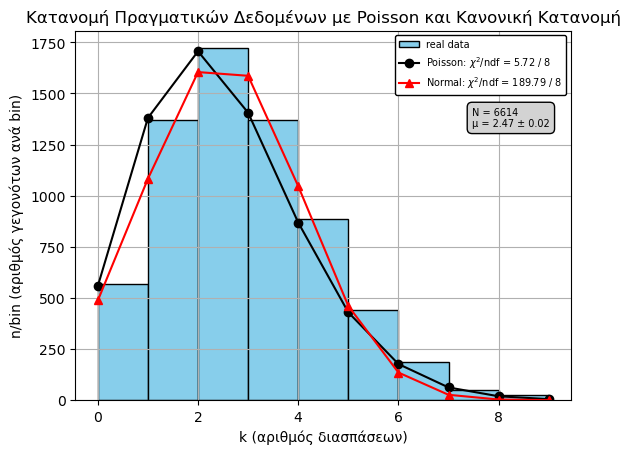

In [288]:
plt.hist(data, bins, color='skyblue',linewidth=1, edgecolor='black', label='real data')
plt.plot(x_data,yp_data,'-o',color='black',label=f'Poisson: $\\chi^2$/ndf = {x1:.2f} / {dof-1}')
plt.plot(x_data,yn_data,'-^',color='r',label=f'Normal: $\\chi^2$/ndf = {x2:.2f} / {dof-1}')
#plt.plot(x_data,yn_data,linestyle='-',label= r'Normal,μ=17.89,$σ^2=17.31$', color='black',marker=1)
plt.title("Κατανομή Πραγματικών Δεδομένων με Poisson και Κανονική Κατανομή")
plt.xlabel("k (αριθμός διασπάσεων)")
plt.ylabel("n/bin (αριθμός γεγονότων ανά bin)")
plt.legend(fontsize=7, loc='upper right', frameon=True, 
           facecolor='white', edgecolor='black', framealpha=1, labelcolor='black')
info_text = f'N = {N}\nμ = {m:.2f} ± {dm:.2f}'
plt.text(0.8,0.74, info_text, transform=plt.gca().transAxes,
         fontsize=7, color='black', bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
plt.grid(True)
plt.savefig("3kbar.png", dpi=300, bbox_inches='tight')